# EDA: Raisin_Dataset.xlsx

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
df = pd.read_excel('data/Raisin_Dataset.xlsx')

In [30]:
print(df.info())
print("\nSummary statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None

Summary statistics:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872     

In [31]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [32]:
class_distribution = df['Class'].value_counts()
print("Class distribution:")
print(class_distribution)

Class distribution:
Class
Kecimen    450
Besni      450
Name: count, dtype: int64


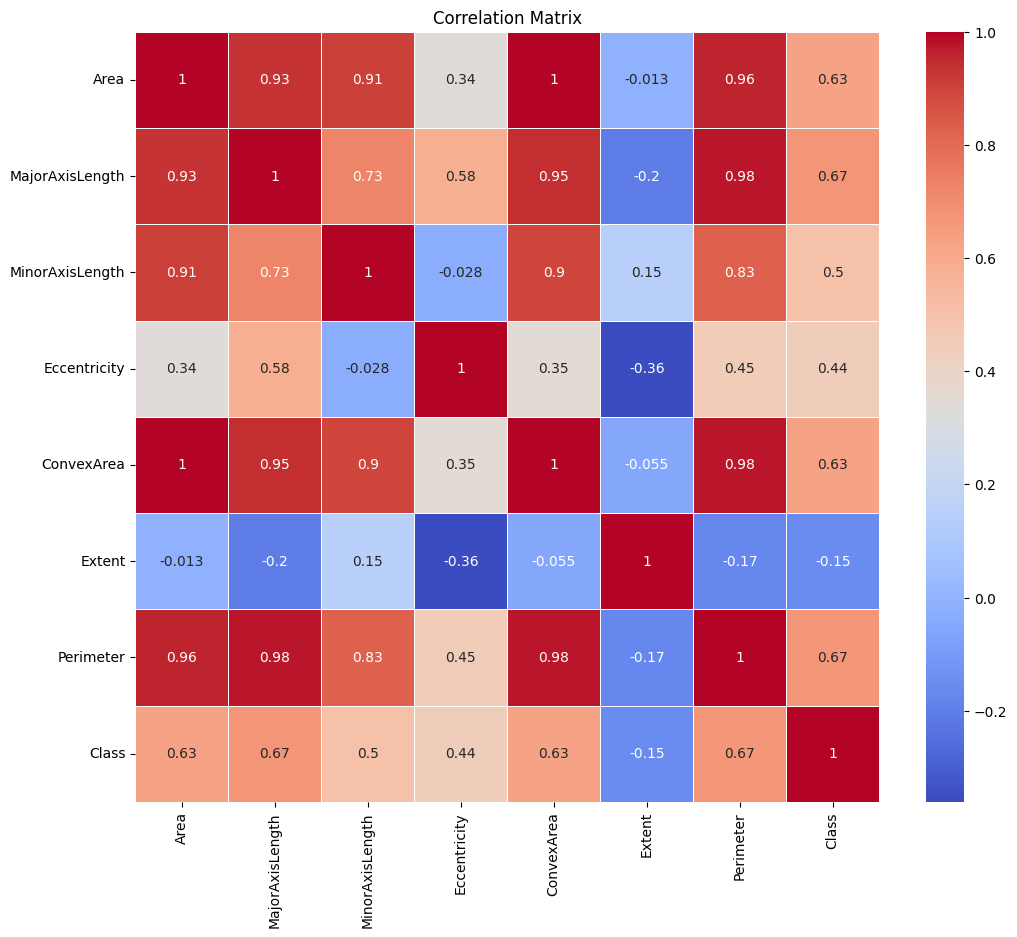

In [33]:
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1}).values
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

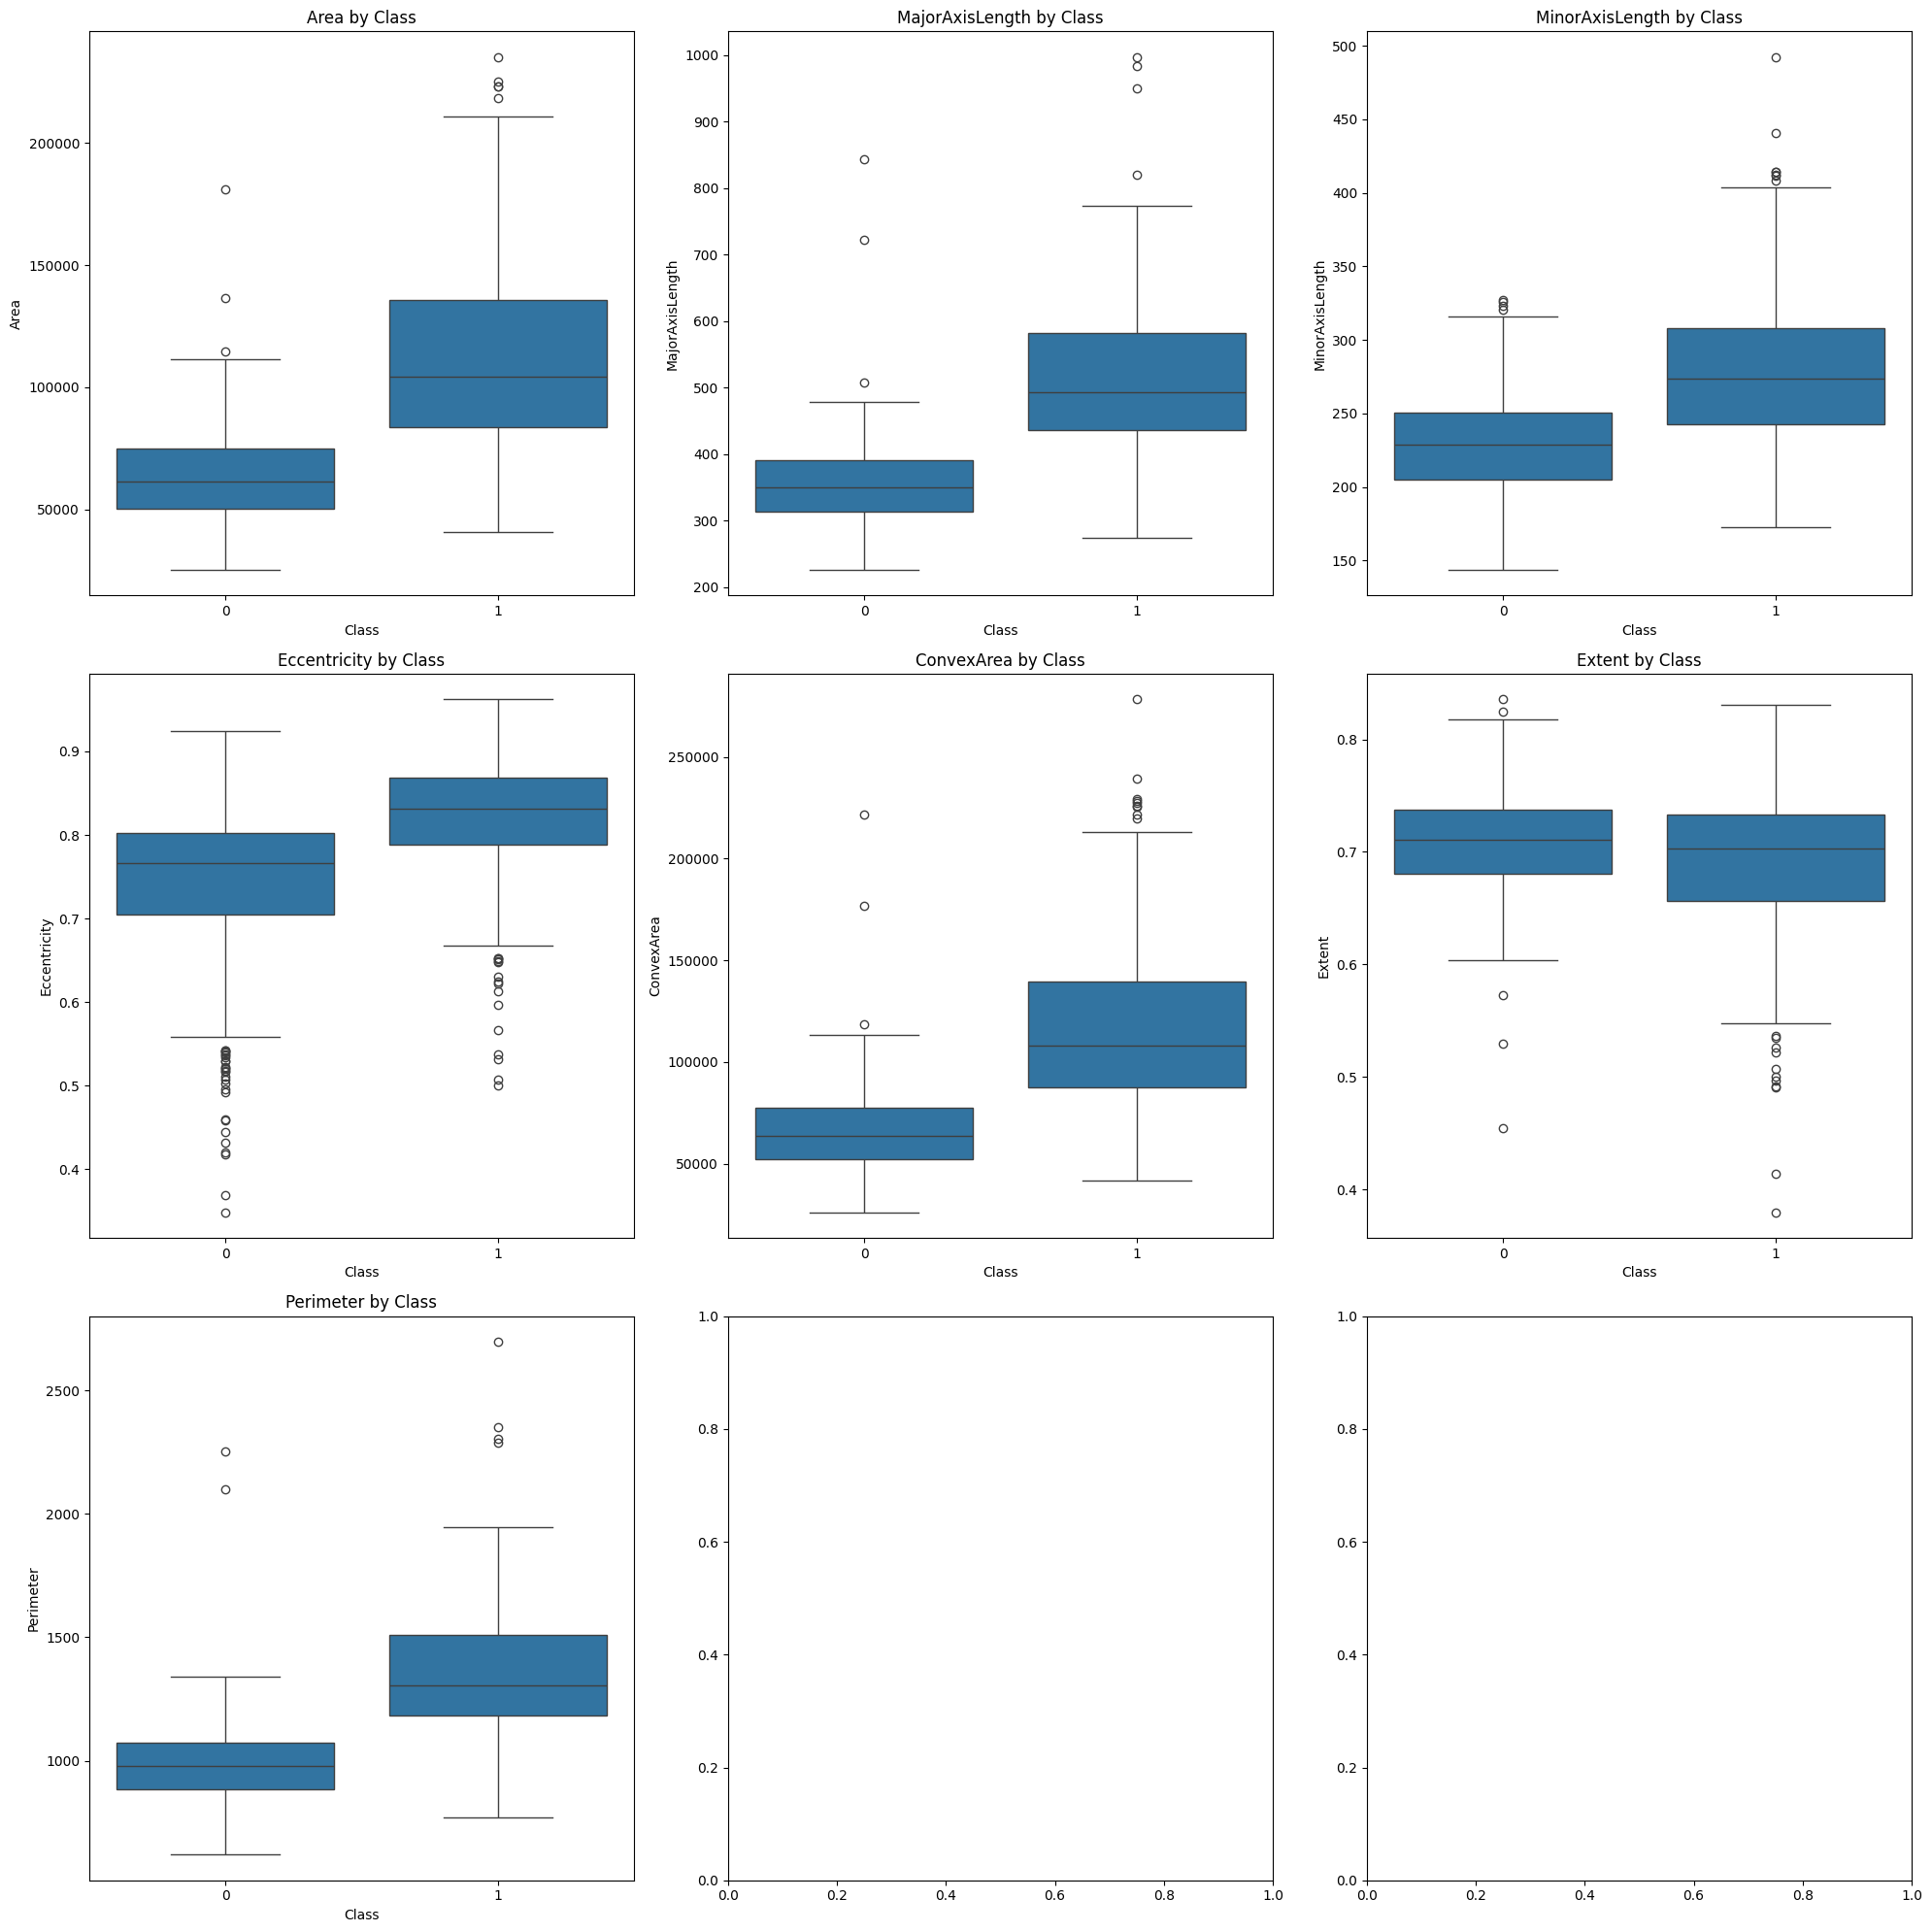

In [34]:
features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Class')

plt.tight_layout()
plt.show()
plt.close()

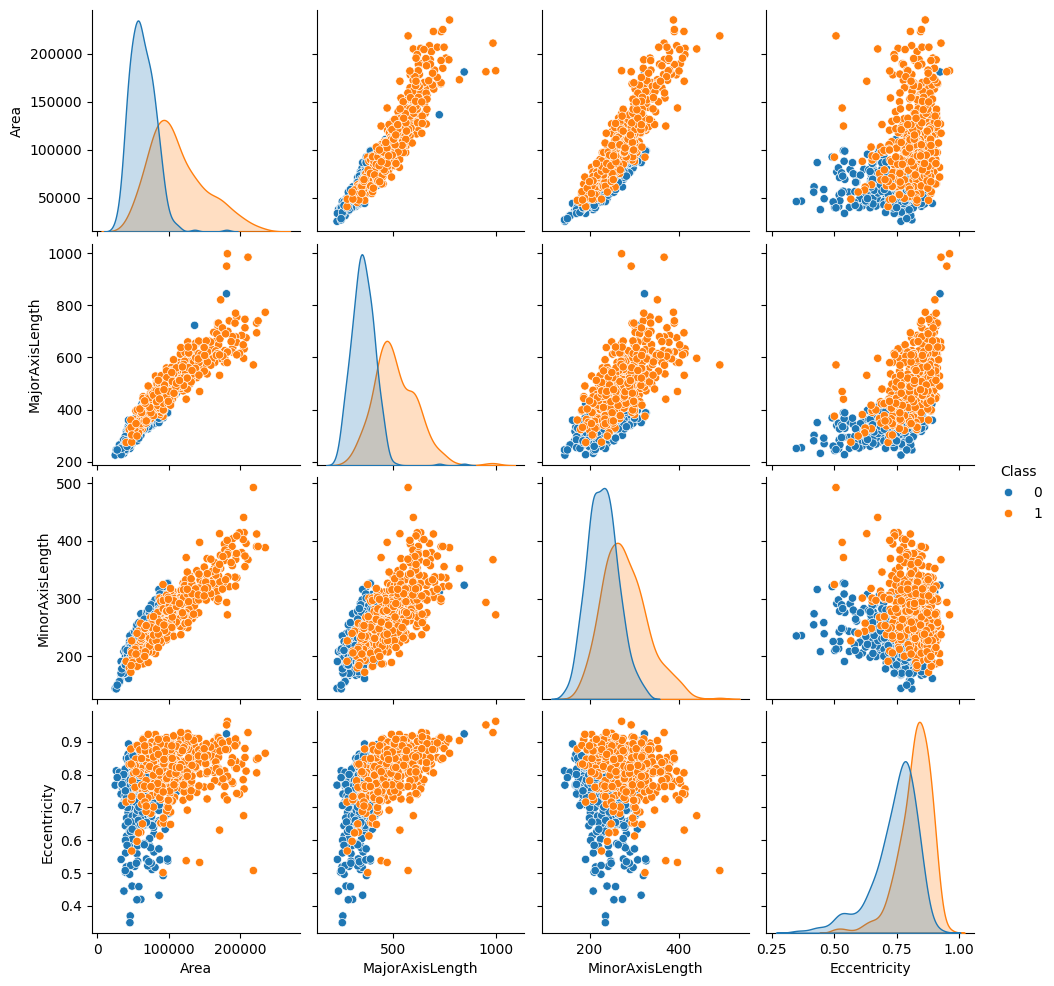

In [35]:
sns.pairplot(df, hue='Class', vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity'])
plt.show()
plt.close()

In [37]:
kecimen = df[df['Class'] == 0]
besni = df[df['Class'] == 1]

for feature in features:
    t_stat, p_value = stats.ttest_ind(kecimen[feature], besni[feature])
    print(f"t-test for {feature}:")
    print(f"\tt-statistic: {t_stat}")
    print(f"\tp-value: {p_value}")

t-test for Area:
	t-statistic: -24.037638741693396
	p-value: 5.6848003725976376e-99
t-test for MajorAxisLength:
	t-statistic: -27.280974009335647
	p-value: 7.675738012797246e-120
t-test for MinorAxisLength:
	t-statistic: -17.444814924159513
	p-value: 6.515103212475129e-59
t-test for Eccentricity:
	t-statistic: -14.621029371255462
	p-value: 1.3828669439453664e-43
t-test for ConvexArea:
	t-statistic: -24.02824630396749
	p-value: 6.52345728342808e-99
t-test for Extent:
	t-statistic: 4.691971855064932
	p-value: 3.1270114235492233e-06
t-test for Perimeter:
	t-statistic: -26.753395473020664
	p-value: 2.0156595640691518e-116
